Comparing pax and XeRawDP

Amaro, de Perio, and Tunnell, April 2016
This tutorial shows you how to compare XeRawDP and pax output


First step is to get the information regarding the cuts passed/fail by each Xe100 event. The tool for that can be found here:
https://xecluster.lngs.infn.it/dokuwiki/doku.php?id=xenon:xenon100:dataprocessing_wg:t4_processing 

You must follow the instructions and install the cuts library XtreeAna and the AddAnalysisCutsBranches. When you run the AddAnalysisCutsBranches on any xe100 dataset you will get 2 outputs: T4 tree (with all the information on the cuts) and a CSV file (with the same information) which you can import into a pandas dataframe .

In [9]:
run boiler_plate.py

In [10]:
%matplotlib inline 

In [11]:
import hax

In [12]:
dataset = "xe100_120227_1547"
print("Loading cut values from", dataset)
df = pd.read_csv('../../AddAnalysisCutsBranches/%s_bool.txt' % dataset, sep='\\t', index_col=0, engine='python')
#this path will work if you hax folder is at the same level as AddAnalysisCutsBranches

Loading cut values from xe100_120227_1547


We can see roughly what this contains by looking at the first few values:

In [13]:
df.head()

,Xsignalnoise_comb,Xentropy0,Xs1width0,Xs2top0,Xs2peaks2,Xs1coin2,Xhighlog1,Xs2single3,Xs1single4,Xveto2,...,Xlownoise0_m,Xn3sigma,Xs2peakpos0,Xtime_diff_50,X34kg2,Xs1single5,X34kg,X48kg0,Xs1coin0,XDM
event,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,0
1,0,1,1,1,1,1,1,0,1,0,...,0,0,1,0,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,0,...,1,0,1,0,0,1,0,1,1,0
3,0,1,1,1,1,1,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4,1,0,1,1,0,1,1,1,1,0,...,1,0,0,0,0,1,0,0,1,0


In [14]:
hax.init(experiment='XENON100',
         main_data_paths=['/home/user/Xenon_100/DataFiles/PAX_REPROCESSED/'])
# modify with your path for the data files
df = df.join(hax.minitrees.load(dataset))

Found minitree at ./xe100_120227_1547_Basics.root


In [15]:
df.head()

,Xsignalnoise_comb,Xentropy0,Xs1width0,Xs2top0,Xs2peaks2,Xs1coin2,Xhighlog1,Xs2single3,Xs1single4,Xveto2,...,largest_other_s2,largest_unknown,largest_veto,s1,s1_area_fraction_top,s2,s2_area_fraction_top,x,y,z
event,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,859.932861,0.0,0.000000,1072.108887,0.136132,310414.031250,0.350019,11.892453,4.171698,-19.909113
1,0,1,1,1,1,1,1,0,1,0,...,24153.117188,0.0,9.100586,927.390076,0.111803,226750.453125,0.377256,11.643396,6.662264,-16.910862
2,1,1,1,1,1,1,1,1,1,0,...,151.566666,0.0,25.892330,1444.435791,0.064499,191977.531250,0.421577,9.650944,-3.673585,-28.745581
3,0,1,1,1,1,1,1,0,1,0,...,15262.319336,0.0,10.205989,1007.872742,0.077767,133552.000000,0.455015,11.892453,-0.435849,-27.439680
4,1,0,1,1,0,1,1,1,1,0,...,22.093863,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now we can play with both. For example:

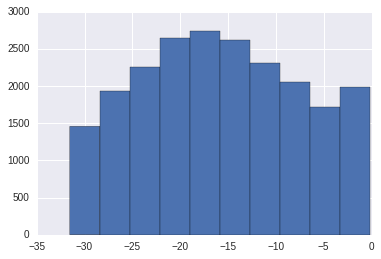

In [16]:
df[df['Xsignalnoise_comb'] == 1]['z'].hist()
#df[df['Xentropy0']==1]['z'].hist()